# Distributions

In [3]:
import numpy as np
import pandas as pd #called alias > pd
import matplotlib.pyplot as plt # getting  the pyplot package from matplotlib

In [2]:
%matplotlib inline

## Load Seasons Data

In [4]:
nba = pd.read_csv("./data/season_stats.csv")

In [10]:
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


### Use `value_counts()` to view all unique values in a distribution and their frequencies.

In [7]:
shoot = nba['TS%'].value_counts()
shoot.head() # shows how many player have this points 0.500 points 235 players, explore the column you'll work with.

0.500    235
0.000    201
0.521    188
0.533    186
0.530    182
Name: TS%, dtype: int64

In [13]:
sorted_shoot = nba['TS%'].value_counts().sort_index() # it will sort least to greatest by default. or ascending=False as argument.
sorted_shoot.head()

0.000    201
0.046      1
0.051      2
0.056      2
0.063      1
Name: TS%, dtype: int64

### Use matplotlib to plot a Histogram to Visualize a Distribution

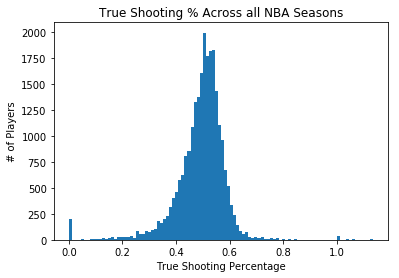

In [21]:
plt.hist(nba['TS%'], bins=100)

# Make it pretty 
plt.title("True Shooting % Across all NBA Seasons")
plt.xlabel("True Shooting Percentage")
plt.ylabel("# of Players")

# "print" the plot
plt.show()

### How different is the NBA Now than in 1950?

In [22]:
#creating a sub data frame. 
first_year = nba['Year'].min()
last_year = nba['Year'].max()
print(first_year, last_year)

1950.0 2017.0


In [24]:
y_1950 = nba[nba['Year'] == first_year] # [passes a boolean.]
y_1950.head()
y_1950.shape

(312, 52)

In [26]:
y_2017 = nba[nba['Year'] == last_year]

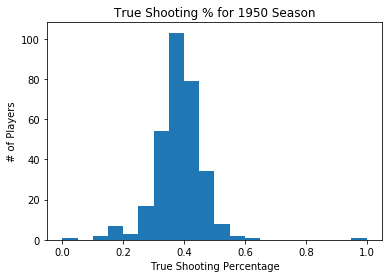

In [27]:
plt.hist(y_1950['TS%'], bins=20)

# Make it pretty 
plt.title("True Shooting % for 1950 Season")
plt.xlabel("True Shooting Percentage")
plt.ylabel("# of Players")

# "print" the plot
plt.show()

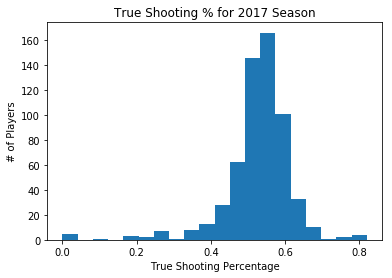

In [28]:
plt.hist(y_2017['TS%'], bins=20)

# Make it pretty 
plt.title("True Shooting % for 2017 Season")
plt.xlabel("True Shooting Percentage")
plt.ylabel("# of Players")

# "print" the plot
plt.show()

Using only the data from the Histograms for both years... What has happened to True Shooting % between 1950 and 2017?

In [ ]:
#short answer > number of players increased. Why it looked like it shifted left? in 1950 it was around .4 in 2017 it about .5

## Load Player Data

In [38]:
players = pd.read_csv('./data/player_data.csv')
players.head(21)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN


### Does The College Attended affect performance in NBA?

In [32]:
top_5_colleges = ['University of Kentucky',
                  'Duke University',
                  'University of Kansas',
                  'Syracuse University',
                  'University of California, Los Angeles',
                 ]
# universities might change from year to year so this filter is not accurate.

In [35]:
# Check "college" column against top_5_colleges
in_top_5_colleges = players['college'].isin(top_5_colleges)

print(in_top_5_colleges.head(15))

0      True
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: college, dtype: bool


In [36]:
# index entire players df by "in_top_5"
players_in_top_5 = players[in_top_5_colleges]['name'] #asking just the name of this series. do some exploration on this one !! 

In [39]:
top_college = nba[nba['Player'].isin(players_in_top_5)]
top_college.shape

(2198, 52)

In [40]:
bottom_college = nba[~nba['Player'].isin(players_in_top_5)] # ~ this is Pandas version of not. only works on Pandas objects or series.
bottom_college.shape

(22493, 52)

#### Plot the Players not from Top 5

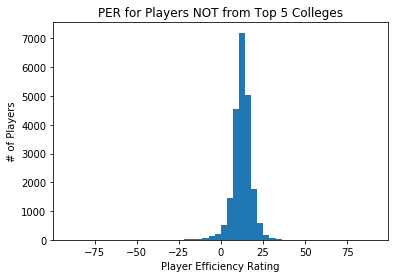

In [41]:
plt.hist(bottom_college['PER'], bins=50)

# Make it pretty 
plt.title("PER for Players NOT from Top 5 Colleges")
plt.xlabel("Player Efficiency Rating")
plt.ylabel("# of Players")

# "print" the plot
plt.show()

#### Plot the Players from Top 5

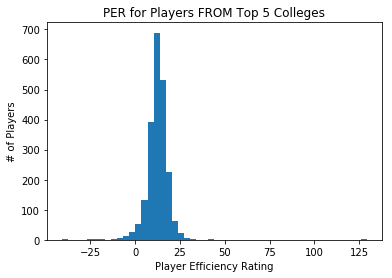

In [42]:
plt.hist(top_college['PER'], bins=50)

# Make it pretty 
plt.title("PER for Players FROM Top 5 Colleges")
plt.xlabel("Player Efficiency Rating")
plt.ylabel("# of Players")

# "print" the plot
plt.show()

What conclusions can we draw about these 2 groups?

In [ ]:
# Short answer according to this PER value no significant difference between college attending or not. you can look at the means of those for example or value counts.